In [1]:
#importando tudo que vai precisar
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

matplotlib.style.use('bmh')

In [2]:
#lendo e limpando o dataframe
df = pd.read_excel(os.path.expanduser('~/Google Drive/Grupo Mercado/Regressao/PIBExpImp.xlsx'))
df = df.head(24)
df = df.tail(23)

df.replace("-",np.nan,inplace = True)

df.drop(columns = ['pib','exportacao','importacao','pib_mundo','comercio_total'], inplace = True)
df['crescimento_exportacao'] = df['crescimento_exportacao'].astype('float')
df['crescimento_comercio_total'] = df['crescimento_comercio_total'].astype('float')
df['crescimento_importacao'] = df['crescimento_importacao'].astype('float')
df['crescimento_pib'] = df['crescimento_pib'].astype('float')
df['crescimento_pib_mundo'] = df['crescimento_pib_mundo'].astype('float')

In [3]:
df.corr()

,year,crescimento_pib,crescimento_exportacao,crescimento_importacao,crescimento_comercio_total,crescimento_pib_mundo,dummy_crise_2009,dummy_recuperacao
year,1.000000,-0.171101,-0.144853,-0.206446,-0.192192,-0.082869,0.096424,0.348932
crescimento_pib,-0.171101,1.000000,0.326154,0.665153,0.566287,0.547959,-0.011401,0.189065
crescimento_exportacao,-0.144853,0.326154,1.000000,0.732530,0.898793,0.617816,-0.440352,0.314452
crescimento_importacao,-0.206446,0.665153,0.732530,1.000000,0.956308,0.647381,-0.288703,0.271856
crescimento_comercio_total,-0.192192,0.566287,0.898793,0.956308,1.000000,0.677709,-0.369443,0.310782
crescimento_pib_mundo,-0.082869,0.547959,0.617816,0.647381,0.677709,1.000000,-0.402273,0.172646
dummy_crise_2009,0.096424,-0.011401,-0.440352,-0.288703,-0.369443,-0.402273,1.000000,-0.065795
dummy_recuperacao,0.348932,0.189065,0.314452,0.271856,0.310782,0.172646,-0.065795,1.000000


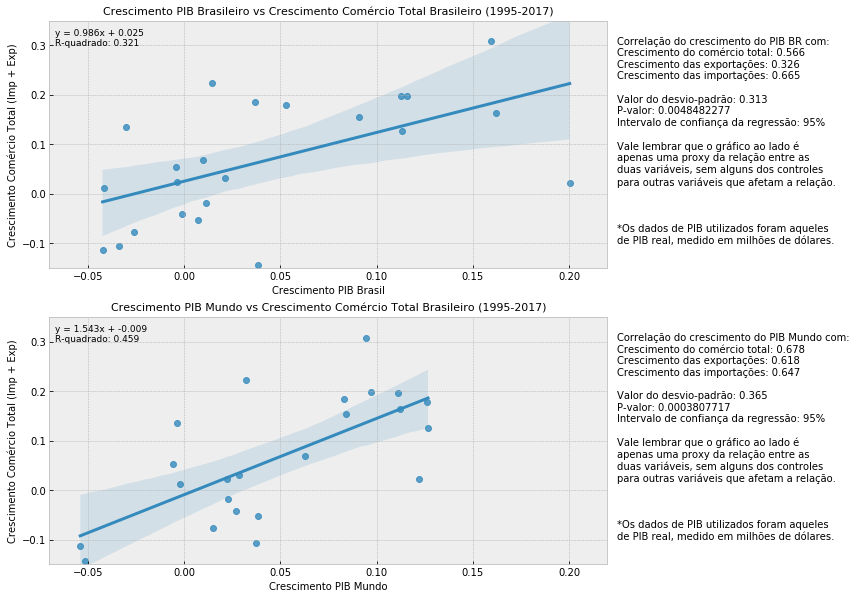

In [4]:
#criando um objeto de regressão linear
lmbr = LinearRegression()
lmmundo = LinearRegression()

#criando variáveis e determinando o modelo
xbr = df[['crescimento_pib']]
xmundo = df[['crescimento_pib_mundo']]
y = df['crescimento_comercio_total']

lmbr.fit(xbr,y)
lmmundo.fit(xmundo,y)
yhatbr = lmbr.predict(xbr)
yhatmundo = lmmundo.predict(xmundo)

#tomando as estatísticas
slope, intercept, r_value, p_value, std_err = stats.linregress(df['crescimento_pib'],df['crescimento_comercio_total'])
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(df['crescimento_pib'],df['crescimento_exportacao'])
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(df['crescimento_pib'],df['crescimento_importacao'])

slope3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(df['crescimento_pib_mundo'],df['crescimento_comercio_total'])
slope4, intercept4, r_value4, p_value4, std_err4 = stats.linregress(df['crescimento_pib_mundo'],df['crescimento_exportacao'])
slope5, intercept5, r_value5, p_value5, std_err5 = stats.linregress(df['crescimento_pib_mundo'],df['crescimento_importacao'])

#plottando o gráfico

fig, (ax1,ax2) = plt.subplots(nrows = 2, figsize = (10,10))

sns.regplot(xbr,y, ax = ax1)
ax1.annotate(f'y = {round(lmbr.coef_[0],3)}x + {round(lmbr.intercept_,3)}\nR-quadrado: {round(lmbr.score(xbr,y),3)}',xy=(-0.067,0.3),fontsize = 9)
ax1.set_ylabel("Crescimento Comércio Total (Imp + Exp)",fontsize = 10)
ax1.set_xlabel("Crescimento PIB Brasil",fontsize = 10)
ax1.set_title("Crescimento PIB Brasileiro vs Crescimento Comércio Total Brasileiro (1995-2017)",fontsize = 11)
ax1.set_xlim(-0.07,0.22)
ax1.set_ylim(-0.15,0.35)

ax1.text(0.225,-0.1, f"Correlação do crescimento do PIB BR com:\nCrescimento do comércio total: {round(r_value,3)}\nCrescimento das exportações: {round(r_value1,3)}\nCrescimento das importações: {round(r_value2,3)}\n\nValor do desvio-padrão: {round(std_err,3)}\nP-valor: {round(p_value,10)}\nIntervalo de confiança da regressão: 95%\n\nVale lembrar que o gráfico ao lado é\napenas uma proxy da relação entre as\nduas variáveis, sem alguns dos controles\npara outras variáveis que afetam a relação.\n\n\n\n*Os dados de PIB utilizados foram aqueles\nde PIB real, medido em milhões de dólares.", fontsize = 10)

sns.regplot(xmundo,y, ax = ax2)
ax2.annotate(f'y = {round(lmmundo.coef_[0],3)}x + {round(lmmundo.intercept_,3)}\nR-quadrado: {round(lmmundo.score(xmundo,y),3)}',xy=(-0.067,0.3),fontsize = 9)
ax2.set_ylabel("Crescimento Comércio Total (Imp + Exp)",fontsize = 10)
ax2.set_xlabel("Crescimento PIB Mundo",fontsize = 10)
ax2.set_title("Crescimento PIB Mundo vs Crescimento Comércio Total Brasileiro (1995-2017)",fontsize = 11)
ax2.set_xlim(-0.07,0.22)
ax2.set_ylim(-0.15,0.35)

ax2.text(0.225,-0.1, f"Correlação do crescimento do PIB Mundo com:\nCrescimento do comércio total: {round(r_value3,3)}\nCrescimento das exportações: {round(r_value4,3)}\nCrescimento das importações: {round(r_value5,3)}\n\nValor do desvio-padrão: {round(std_err3,3)}\nP-valor: {round(p_value3,10)}\nIntervalo de confiança da regressão: 95%\n\nVale lembrar que o gráfico ao lado é\napenas uma proxy da relação entre as\nduas variáveis, sem alguns dos controles\npara outras variáveis que afetam a relação.\n\n\n\n*Os dados de PIB utilizados foram aqueles\nde PIB real, medido em milhões de dólares.", fontsize = 10)

plt.savefig("Modelos de RLS.png", dpi = 300)


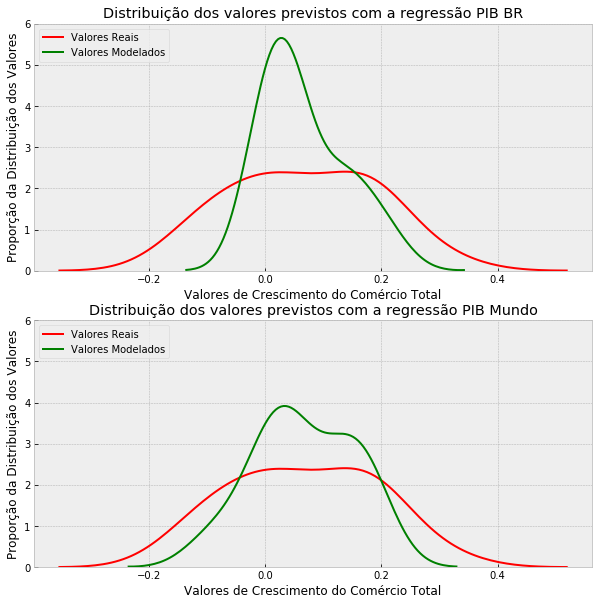

In [5]:
fig, (ax3,ax4) = plt.subplots(nrows = 2, figsize = (10,10))

sns.distplot(df['crescimento_comercio_total'], hist = False, color = 'r', label = 'Valores Reais', ax = ax3)
sns.distplot(yhatbr, hist = False, color = 'g', label = 'Valores Modelados', ax = ax3)
ax3.legend(loc='upper left')
ax3.set_xlabel("Valores de Crescimento do Comércio Total")
ax3.set_ylabel("Proporção da Distribuição dos Valores")
ax3.set_title("Distribuição dos valores previstos com a regressão PIB BR")
ax3.set_ylim(0,6)

sns.distplot(df['crescimento_comercio_total'], hist = False, color = 'r', label = 'Valores Reais', ax = ax4)
sns.distplot(yhatmundo, hist = False, color = 'g', label = 'Valores Modelados', ax = ax4)
ax4.legend(loc='upper left')
ax4.set_xlabel("Valores de Crescimento do Comércio Total")
ax4.set_ylabel("Proporção da Distribuição dos Valores")
ax4.set_title("Distribuição dos valores previstos com a regressão PIB Mundo")
ax4.set_ylim(0,6)

plt.savefig("Distribuição dos modelos de RLS.png", dpi = 300)

Significância do coeficiente referente ao PIB Brasileiro:
	P-valor: 0.0048482276561900685
	Desvio-Padrão:0.31321540809233434

Significância do coeficiente referente ao PIB Mundial:
	P-valor: 0.0003807717184194927
	Desvio-Padrão:0.3652453405660417

Significância do coeficiente referente à dummy de crise:
	P-valor: 0.08274627792580734
	Desvio-Padrão:0.1205796876858766


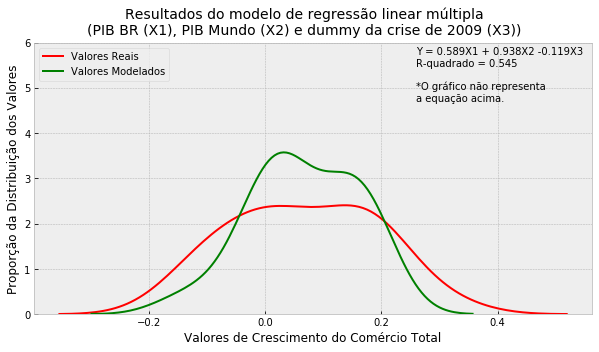

In [6]:
#regressao múltipla
mlm = LinearRegression()

xm = df[['crescimento_pib','crescimento_pib_mundo','dummy_crise_2009']]
ym = df['crescimento_comercio_total']

mlm.fit(xm,ym)
yhatm = mlm.predict(xm)

fig,ax = plt.subplots(nrows = 1, figsize =(10,5))

fig.suptitle("Resultados do modelo de regressão linear múltipla\n(PIB BR (X1), PIB Mundo (X2) e dummy da crise de 2009 (X3))", fontsize = 14)

sns.distplot(df['crescimento_comercio_total'], hist = False, color = 'r', label = 'Valores Reais')
sns.distplot(yhatm, hist = False, color = 'g', label = 'Valores Modelados')
ax.legend(loc='upper left')
ax.set_xlabel("Valores de Crescimento do Comércio Total")
ax.set_ylabel("Proporção da Distribuição dos Valores")
ax.set_ylim(0,6)
ax.text(0.26,4.7,f"Y = {round(mlm.coef_[0],3)}X1 + {round(mlm.coef_[1],3)}X2 {round(mlm.coef_[2],3)}X3\nR-quadrado = {round(mlm.score(xm,ym),3)}\n\n*O gráfico não representa\na equação acima.")

slopePIBBR, interceptPIBBR, r_valuePIBBR, p_valuePIBBR, std_errPIBBR = stats.linregress(df['crescimento_pib'],df['crescimento_comercio_total'])
slopePIBMUNDO, interceptPIBMUNDO, r_valuePIBMUNDO, p_valuePIBMUNDO, std_errPIBMUNDO = stats.linregress(df['crescimento_pib_mundo'],df['crescimento_comercio_total'])
slopeDUMMY, interceptDUMMY, r_valueDUMMY, p_valueDUMMY, std_errDUMMY = stats.linregress(df['dummy_crise_2009'],df['crescimento_comercio_total'])

print(f"Significância do coeficiente referente ao PIB Brasileiro:\n\tP-valor: {p_valuePIBBR}\n\tDesvio-Padrão:{std_errPIBBR}")
print(f"\nSignificância do coeficiente referente ao PIB Mundial:\n\tP-valor: {p_valuePIBMUNDO}\n\tDesvio-Padrão:{std_errPIBMUNDO}")
print(f"\nSignificância do coeficiente referente à dummy de crise:\n\tP-valor: {p_valueDUMMY}\n\tDesvio-Padrão:{std_errDUMMY}")
#plt.savefig("Distribuição do modelo de RLM.png", dpi = 300)

In [7]:
#regressao múltipla com três fatores (crises em 2009,2015 e 2016)
mlm2 = LinearRegression()

xm2 = df[['crescimento_pib','crescimento_pib_mundo','dummy_crise']]
ym2 = df['crescimento_comercio_total']

mlm2.fit(xm2,ym2)
yhatm2 = mlm2.predict(xm2)

fig,ax = plt.subplots(nrows = 1, figsize =(10,5))

fig.suptitle("Resultados do modelo de regressão linear múltipla\n(PIB BR (X1), PIB Mundo (X2) e dummy de crises (X3))", fontsize = 14)

sns.distplot(df['crescimento_comercio_total'], hist = False, color = 'r', label = 'Valores Reais')
sns.distplot(yhatm2, hist = False, color = 'g', label = 'Valores Modelados')
ax.legend(loc='upper left')
ax.set_xlabel("Valores de Crescimento do Comércio Total")
ax.set_ylabel("Proporção da Distribuição dos Valores")
ax.set_ylim(0,6)
ax.text(0.26,4.7,f"Y = {round(mlm2.coef_[0],3)}X1 + {round(mlm2.coef_[1],3)}X2 {round(mlm2.coef_[2],3)}X3\nR-quadrado = {round(mlm2.score(xm2,ym2),3)}\n\n*O gráfico não representa\na equação acima.")

slopePIBBR, interceptPIBBR, r_valuePIBBR, p_valuePIBBR, std_errPIBBR = stats.linregress(df['crescimento_pib'],df['crescimento_comercio_total'])
slopePIBMUNDO, interceptPIBMUNDO, r_valuePIBMUNDO, p_valuePIBMUNDO, std_errPIBMUNDO = stats.linregress(df['crescimento_pib_mundo'],df['crescimento_exportacao'])
slopeDUMMY, interceptDUMMY, r_valueDUMMY, p_valueDUMMY, std_errDUMMY = stats.linregress(df['dummy_crise'],df['crescimento_importacao'])

print(f"Significância do coeficiente referente ao PIB Brasileiro:\n\tP-valor: {p_valuePIBBR}\n\tDesvio-Padrão:{std_errPIBBR}")
print(f"\nSignificância do coeficiente referente ao PIB Mundial:\n\tP-valor: {p_valuePIBMUNDO}\n\tDesvio-Padrão:{std_errPIBMUNDO}")
print(f"\nSignificância do coeficiente referente à dummy de crise:\n\tP-valor: {p_valueDUMMY}\n\tDesvio-Padrão:{std_errDUMMY}")#regressao múltipla com três fatores (crises em 2009,2015 e 2016)
mlm2 = LinearRegression()

xm2 = df[['crescimento_pib','crescimento_pib_mundo','dummy_crise']]
ym2 = df['crescimento_comercio_total']

mlm2.fit(xm2,ym2)
yhatm2 = mlm2.predict(xm2)

fig,ax = plt.subplots(nrows = 1, figsize =(10,5))

fig.suptitle("Resultados do modelo de regressão linear múltipla\n(PIB BR (X1), PIB Mundo (X2) e dummy de crises (X3))", fontsize = 14)

sns.distplot(df['crescimento_comercio_total'], hist = False, color = 'r', label = 'Valores Reais')
sns.distplot(yhatm2, hist = False, color = 'g', label = 'Valores Modelados')
ax.legend(loc='upper left')
ax.set_xlabel("Valores de Crescimento do Comércio Total")
ax.set_ylabel("Proporção da Distribuição dos Valores")
ax.set_ylim(0,6)
ax.text(0.26,4.7,f"Y = {round(mlm2.coef_[0],3)}X1 + {round(mlm2.coef_[1],3)}X2 {round(mlm2.coef_[2],3)}X3\nR-quadrado = {round(mlm2.score(xm2,ym2),3)}\n\n*O gráfico não representa\na equação acima.")

slopePIBBR, interceptPIBBR, r_valuePIBBR, p_valuePIBBR, std_errPIBBR = stats.linregress(df['crescimento_pib'],df['crescimento_comercio_total'])
slopePIBMUNDO, interceptPIBMUNDO, r_valuePIBMUNDO, p_valuePIBMUNDO, std_errPIBMUNDO = stats.linregress(df['crescimento_pib_mundo'],df['crescimento_comercio_total'])
slopeDUMMY, interceptDUMMY, r_valueDUMMY, p_valueDUMMY, std_errDUMMY = stats.linregress(df['dummy_crise'],df['crescimento_comercio_total'])

print(f"Significância do coeficiente referente ao PIB Brasileiro:\n\tP-valor: {p_valuePIBBR}\n\tDesvio-Padrão:{std_errPIBBR}")
print(f"\nSignificância do coeficiente referente ao PIB Mundial:\n\tP-valor: {p_valuePIBMUNDO}\n\tDesvio-Padrão:{std_errPIBMUNDO}")
print(f"\nSignificância do coeficiente referente à dummy de crise:\n\tP-valor: {p_valueDUMMY}\n\tDesvio-Padrão:{std_errDUMMY}")

KeyError: "['dummy_crise'] not in index"

In [8]:
#fazendo um modelo com a dummy de recuperação
mlm3 = LinearRegression()

xm3 = df[['crescimento_pib','crescimento_pib_mundo','dummy_crise','dummy_recuperacao']]
ym3 = df['crescimento_comercio_total']

mlm3.fit(xm3,ym3)
yhatm3 = mlm3.predict(xm3)

fig,ax = plt.subplots(nrows = 1, figsize =(10,5))

fig.suptitle("Resultados do modelo de regressão linear múltipla\n(PIB BR (X1), PIB Mundo (X2), dummy de crises (X3) e dummy de recuperação (X4))", fontsize = 14)

sns.distplot(df['crescimento_comercio_total'], hist = False, color = 'r', label = 'Valores Reais')
sns.distplot(yhatm3, hist = False, color = 'g', label = 'Valores Modelados')
ax.legend(loc='upper left')
ax.set_xlabel("Valores de Crescimento do Comércio Total")
ax.set_ylabel("Proporção da Distribuição dos Valores")
ax.set_ylim(0,6)
ax.text(0.26,4.7,f"Y = {round(mlm3.coef_[0],3)}X1 + {round(mlm3.coef_[1],3)}X2 + {round(mlm3.coef_[2],3)}X3 + {round(mlm3.coef_[3],3)}\nR-quadrado = {round(mlm2.score(xm2,ym2),3)}\n\n*O gráfico não representa\na equação acima.")

slopePIBBR, interceptPIBBR, r_valuePIBBR, p_valuePIBBR, std_errPIBBR = stats.linregress(df['crescimento_pib'],df['crescimento_comercio_total'])
slopePIBMUNDO, interceptPIBMUNDO, r_valuePIBMUNDO, p_valuePIBMUNDO, std_errPIBMUNDO = stats.linregress(df['crescimento_pib_mundo'],df['crescimento_comercio_total'])
slopeDUMMY, interceptDUMMY, r_valueDUMMY, p_valueDUMMY, std_errDUMMY = stats.linregress(df['dummy_crise'],df['crescimento_comercio_total'])
slopeRECUPERACAO, interceptRECUPERACAO, r_valueRECUPERACAO, p_valueRECUPERACAO, std_errRECUPERACAO = stats.linregress(df['dummy_recuperacao'],df['crescimento_comercio_total'])

print(f"Significância do coeficiente referente ao PIB Brasileiro:\n\tP-valor: {p_valuePIBBR}\n\tDesvio-Padrão:{std_errPIBBR}")
print(f"\nSignificância do coeficiente referente ao PIB Mundial:\n\tP-valor: {p_valuePIBMUNDO}\n\tDesvio-Padrão:{std_errPIBMUNDO}")
print(f"\nSignificância do coeficiente referente à dummy de crise:\n\tP-valor: {p_valueDUMMY}\n\tDesvio-Padrão:{std_errDUMMY}")
print(f"\nSignificância do coeficiente referente à dummy de recuperação:\n\tP-valor: {p_valueRECUPERACAO}\n\tDesvio-Padrão:{std_errRECUPERACAO}")
#plt.savefig("Distribuição do modelo de RLM.png", dpi = 300)

KeyError: "['dummy_crise'] not in index"

**Previsões para o desempenho do comércio total em 2020 e 2021**

In [9]:
#previsões de PIB Brasil
fmibr20 = -0.053 #14/4
fmibr21 = 0.029
eiubr20 = -0.055 #26/3
bancomundialbr20 = -0.05 #13/4
iifbr20 = -0.04 #13/4
focusbr20 = -0.0411 #8/5
focusbr21 = 0.032
govbr20 = -0.047

fmimundo20 = -0.03
fmimundo21 = 0.058

projecoes_brasil_2020 = [fmibr20,eiubr20,bancomundialbr20,iifbr20,focusbr20,govbr20]
projecoes_brasil_2021 = [fmibr21,focusbr21]

#calculando as médias das projeções para o brasil 2020
previsao_pibbr_2020 = np.mean(projecoes_brasil_2020)
previsao_pibbr_2021 = np.mean(projecoes_brasil_2021)

print(f"Média das previsões para o PIB Brasileiro em 2020: {round(previsao_pibbr_2020*100,3)}%")
print(f"Média das previsões para o PIB Brasileiro em 2021: {round(previsao_pibbr_2021*100,3)}%")
print(f"Previsão do FMI para o PIB Mundial em 2020: {fmimundo20*100}%")
print(f"Previsão do FMI para o PIB Mundial em 2021: {round(fmimundo21*100,2)}%")

Média das previsões para o PIB Brasileiro em 2020: -4.768%
Média das previsões para o PIB Brasileiro em 2021: 3.05%
Previsão do FMI para o PIB Mundial em 2020: -3.0%
Previsão do FMI para o PIB Mundial em 2021: 5.8%


In [10]:
#Regressão Linear Simples (PIB BR)
previsao_rls_pibbr_2020 = lmbr.predict([[previsao_pibbr_2020]])
previsao_rls_pibbr_2021 = lmbr.predict([[previsao_pibbr_2021]])

print (f"Previsão do desempenho do comércio exterior total do Brasil em 2020: {round(previsao_rls_pibbr_2020[0]*100,3)}%")
print (f"Previsão do desempenho do comércio exterior total do Brasil em 2021: {round(previsao_rls_pibbr_2021[0]*100,3)}%")

Previsão do desempenho do comércio exterior total do Brasil em 2020: -2.182%
Previsão do desempenho do comércio exterior total do Brasil em 2021: 5.528%


In [11]:
#Regressão Linear Simples (PIB Mundo)
previsao_rls_pibmundo_2020 = lmmundo.predict([[fmimundo20]])
previsao_rls_pibmundo_2021 = lmmundo.predict([[fmimundo21]])

print (f"Previsão do desempenho do comércio exterior total do Brasil em 2020: {round(previsao_rls_pibmundo_2020[0]*100,3)}%")
print (f"Previsão do desempenho do comércio exterior total do Brasil em 2021: {round(previsao_rls_pibmundo_2021[0]*100,3)}%")

Previsão do desempenho do comércio exterior total do Brasil em 2020: -5.537%
Previsão do desempenho do comércio exterior total do Brasil em 2021: 8.038%


In [12]:
#Regressão Linear Múltipla (com dummy = 0)
rlm0_2020 = np.array([[previsao_pibbr_2020,fmimundo20,0]])
rlm0_2021 = np.array([[previsao_pibbr_2021,fmimundo21,0]])

previsao_rlm_d0_2020 = mlm.predict(rlm0_2020)
previsao_rlm_d0_2021 = mlm.predict(rlm0_2021)

print (f"Previsão do desempenho do comércio exterior total do Brasil em 2020: {round(previsao_rlm_d0_2020[0]*100,3)}%")
print (f"Previsão do desempenho do comércio exterior total do Brasil em 2021: {round(previsao_rlm_d0_2021[0]*100,3)}%")

Previsão do desempenho do comércio exterior total do Brasil em 2020: -5.517%
Previsão do desempenho do comércio exterior total do Brasil em 2021: 7.34%


In [13]:
#Regressão Linear Múltipla (com dummy = 1)
rlm1_2020 = np.array([[previsao_pibbr_2020,fmimundo20,1]])
rlm1_2021 = np.array([[previsao_pibbr_2021,fmimundo21,0]])

previsao_rlm_d1_2020 = mlm.predict(rlm1_2020)
previsao_rlm_d1_2021 = mlm.predict(rlm1_2021)

print (f"Previsão do desempenho do comércio exterior total do Brasil em 2020: {round(previsao_rlm_d1_2020[0]*100,3)}%")
print (f"Previsão do desempenho do comércio exterior total do Brasil em 2021: {round(previsao_rlm_d1_2021[0]*100,3)}%")

Previsão do desempenho do comércio exterior total do Brasil em 2020: -17.402%
Previsão do desempenho do comércio exterior total do Brasil em 2021: 7.34%


In [14]:
#Regressão Linear Múltipla para exportações (com dummy = 1)
mlmexp = LinearRegression()
xexp = df[['crescimento_pib','crescimento_pib_mundo','dummy_crise_2009']]
yexp = df['crescimento_exportacao']

mlmexp.fit(xexp,yexp)
yhatexp = mlmexp.predict(xexp)

rlmexp_2020 = np.array([[previsao_pibbr_2020,fmimundo20,1]])
rlmexp_2021 = np.array([[previsao_pibbr_2021,fmimundo21,0]])

previsao_rlm_exp_2020 = mlmexp.predict(rlmexp_2020)
previsao_rlm_exp_2021 = mlmexp.predict(rlmexp_2021)

print (f"Previsão do desempenho das exportações do Brasil em 2020: {round(previsao_rlm_exp_2020[0]*100,3)}%")
print (f"Previsão do desempenho das exportações do Brasil em 2021: {round(previsao_rlm_exp_2021[0]*100,3)}%")
print(f"\nCoeficientes: {mlmexp.coef_}\nR-quadrado: {mlmexp.score(xexp,yexp)}")

Previsão do desempenho das exportações do Brasil em 2020: -13.772%
Previsão do desempenho das exportações do Brasil em 2021: 7.766%

Coeficientes: [ 0.08217927  0.96194263 -0.12430384]
R-quadrado: 0.4275367051247172


Previsões da OMC:

Mundo (2020): de - 12,9% a -31,9% no comércio total

Dados a seguir nos cenários respectivos: recuperação em V, recuperação em U, recuperação em L

Brasil (2020): de -8% a -16,8% a -20,2% nas exportações

Brasil (2021): de 6,2% a 14,3% a 6,1% nas exportações

Correlação do crescimento do comércio total brasileiro com o crescimento das exportações brasileiras: 0,899793

https://www.correiobraziliense.com.br/app/noticia/economia/2020/04/09/internas_economia,843311/catastrofe-no-comercio-global-omc-estima-perdas-na-economia-brasileir.shtml

https://www.wto.org/english/news_e/pres20_e/pr855_e.htm

https://www.wto.org/english/news_e/pres20_e/methodpr855_e.pdf seção 3.1, tabela 6



In [15]:
#gráfico entre a taxa de crescimento do comércio e o crescimento do PIB
df["C.Exp/PIB"] = df['crescimento_exportacao']/df['crescimento_pib']
df["C.Imp/PIB"] = df['crescimento_importacao']/df['crescimento_pib']
df["C.Tot/PIB"] = df['crescimento_comercio_total']/df['crescimento_pib']

df["C.Exp/PIBM"] = df['crescimento_exportacao']/df['crescimento_pib_mundo']
df["C.Imp/PIBM"] = df['crescimento_importacao']/df['crescimento_pib_mundo']
df["C.Tot/PIBM"] = df['crescimento_comercio_total']/df['crescimento_pib_mundo']

df['cinco'] = [5 for i in range(0,23)]
df['menos_cinco'] = [-5 for i in range(0,23)]
df['zero'] = [0 for i in range(0,23)]
df.set_index('year', inplace = True)

In [16]:
df.loc[df['crescimento_pib'] < 0, 'dummyexp'] = df['C.Exp/PIB']
df.loc[df['crescimento_pib'] >= 0, 'dummyexp'] = 40
df.loc[df['crescimento_pib'] < 0, 'dummyimp'] = df['C.Imp/PIB']
df.loc[df['crescimento_pib'] >= 0, 'dummyimp'] = 40
df.loc[df['crescimento_pib'] < 0, 'dummytot'] = df['C.Tot/PIB']
df.loc[df['crescimento_pib'] >= 0, 'dummytot'] = 40

df.loc[df['crescimento_pib_mundo'] < 0, 'dummyexpm'] = df['C.Exp/PIBM']
df.loc[df['crescimento_pib_mundo'] >= 0, 'dummyexpm'] = 40
df.loc[df['crescimento_pib_mundo'] < 0, 'dummyimpm'] = df['C.Imp/PIBM']
df.loc[df['crescimento_pib_mundo'] >= 0, 'dummyimpm'] = 40
df.loc[df['crescimento_pib_mundo'] < 0, 'dummytotm'] = df['C.Tot/PIBM']
df.loc[df['crescimento_pib_mundo'] >= 0, 'dummytotm'] = 40

In [17]:
aexp = df.loc[df.index.values.tolist(),'dummyexp'].to_frame()
aexp.reset_index(inplace = True)
aexp['years'] = aexp['year']
aexp.set_index('years', inplace = True)

aimp = df.loc[df.index.values.tolist(),'dummyimp'].to_frame()
aimp.reset_index(inplace = True)
aimp['years'] = aimp['year']
aimp.set_index('years', inplace = True)

atot = df.loc[df.index.values.tolist(),'dummytot'].to_frame()
atot.reset_index(inplace = True)
atot['years'] = atot['year']
atot.set_index('years', inplace = True)

aexpm = df.loc[df.index.values.tolist(),'dummyexpm'].to_frame()
aexpm.reset_index(inplace = True)
aexpm['years'] = aexpm['year']
aexpm.set_index('years', inplace = True)

aimpm = df.loc[df.index.values.tolist(),'dummyimpm'].to_frame()
aimpm.reset_index(inplace = True)
aimpm['years'] = aimpm['year']
aimpm.set_index('years', inplace = True)

atotm = df.loc[df.index.values.tolist(),'dummytotm'].to_frame()
atotm.reset_index(inplace = True)
atotm['years'] = atotm['year']
atotm.set_index('years', inplace = True)



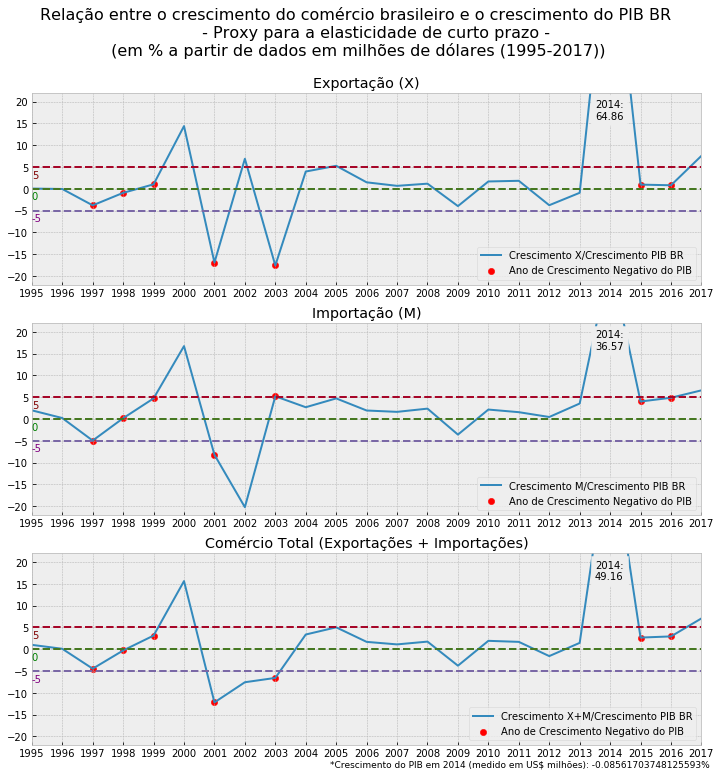

In [18]:
fig, ax = plt.subplots(nrows = 3, figsize = (12,12))
fig.suptitle("Relação entre o crescimento do comércio brasileiro e o crescimento do PIB BR\n         - Proxy para a elasticidade de curto prazo - \n (em % a partir de dados em milhões de dólares (1995-2017))", fontsize = 16, color = 'k')
fig.text(0.47, 0.1,f"*Crescimento do PIB em 2014 (medido em US$ milhões): {df.loc[2014,'crescimento_pib']*100}%", fontsize = 9)

g1 = sns.lineplot(x = df.index.values, y=df['C.Exp/PIB'], ax = ax[0], label = 'Crescimento X/Crescimento PIB BR')
df.loc[df.index.values.tolist(),'cinco'].plot(kind = 'line',ax=ax[0], linestyle = '--',label='_nolegend_')
df.loc[df.index.values.tolist(),'menos_cinco'].plot(kind = 'line',ax=ax[0], linestyle = '--',label='_nolegend_')
df.loc[df.index.values.tolist(),'zero'].plot(kind = 'line',ax=ax[0], linestyle = '--',label='_nolegend_')
aexp.plot(kind='scatter', x = 'year', y = 'dummyexp', color='r', ax = ax[0], s = 40,label='Ano de Crescimento Negativo do PIB')
g1.legend(loc='lower right')
g1.set_title("Exportação (X)", color = 'k')
g1.set_xlabel("")
g1.set_ylabel("")
g1.set_xticks(range(1995,2018,1))
g1.set_xlim(1995,2017)
g1.set_ylim(-22,22)
g1.annotate("5",xy=(1995,2.5), color='#800000')
g1.annotate("0",xy=(1995,-2.5), color='green')
g1.annotate("-5",xy=(1995,-7.5), color='purple')
g1.annotate(f"2014:\n{round(df.loc[2014,'C.Exp/PIB'],2)}", xy = (2013.5,16), backgroundcolor = '#eeeeee', fontsize = 10)


g2 = sns.lineplot(x = df.index.values, y=df['C.Imp/PIB'], ax = ax[1], label = 'Crescimento M/Crescimento PIB BR')
df.loc[df.index.values.tolist(),'cinco'].plot(kind = 'line',ax=ax[1], linestyle = '--',label='_nolegend_')
df.loc[df.index.values.tolist(),'menos_cinco'].plot(kind = 'line',ax=ax[1], linestyle = '--',label='_nolegend_')
df.loc[df.index.values.tolist(),'zero'].plot(kind = 'line',ax=ax[1], linestyle = '--',label='_nolegend_')
aimp.plot(kind='scatter', x = 'year', y = 'dummyimp', color='r', ax = ax[1], s = 40,label='Ano de Crescimento Negativo do PIB')
g2.legend(loc='lower right')
g2.set_title("Importação (M)",color = 'k')
g2.set_xlabel("")
g2.set_ylabel("")
g2.set_xticks(range(1995,2018,1))
g2.set_ylim(-22,22)
g2.set_xlim(1995,2017)
g2.annotate("5",xy=(1995,2.5), color='#800000')
g2.annotate("0",xy=(1995,-2.5), color='green')
g2.annotate("-5",xy=(1995,-7.5), color='purple')
g2.annotate(f"2014:\n{round(df.loc[2014,'C.Imp/PIB'],2)}", xy = (2013.5,16), backgroundcolor = '#eeeeee', fontsize = 10)

g3 = sns.lineplot(x = df.index.values, y=df['C.Tot/PIB'], ax = ax[2],label='Crescimento X+M/Crescimento PIB BR')
df.loc[df.index.values.tolist(),'cinco'].plot(kind = 'line',ax=ax[2], linestyle = '--',label='_nolegend_')
df.loc[df.index.values.tolist(),'menos_cinco'].plot(kind = 'line',ax=ax[2], linestyle = '--',label='_nolegend_')
df.loc[df.index.values.tolist(),'zero'].plot(kind = 'line',ax=ax[2], linestyle = '--',label='_nolegend_')
atot.plot(kind='scatter', x = 'year', y = 'dummytot', color='r', ax = ax[2], s = 40,label='Ano de Crescimento Negativo do PIB')
g3.legend(loc='lower right')
g3.set_title("Comércio Total (Exportações + Importações)", color = 'k')
g3.set_xlabel("")
g3.set_ylabel("")
g3.set_xticks(range(1995,2018,1))
g3.set_ylim(-22,22)
g3.set_xlim(1995,2017)
g3.annotate("5",xy=(1995,2.5), color='#800000')
g3.annotate("0",xy=(1995,-2.5), color='green')
g3.annotate("-5",xy=(1995,-7.5), color='purple')
g3.annotate(f"2014:\n{round(df.loc[2014,'C.Tot/PIB'],2)}", xy = (2013.5,16), backgroundcolor = '#eeeeee', fontsize = 10)

plt.savefig("Elasticidade PIB-Comércio no Brasil.png", dpi = 300)
plt.show()

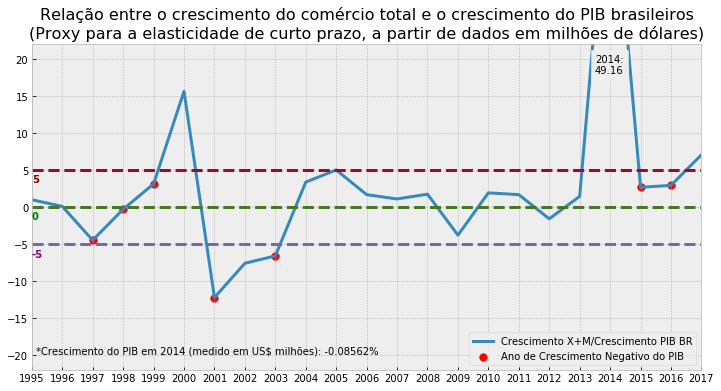

In [19]:
fig, ax = plt.subplots(nrows = 1, figsize = (12,6))

g = sns.lineplot(x = df.index.values, y=df['C.Tot/PIB'], ax = ax,label='Crescimento X+M/Crescimento PIB BR', linewidth = 3)
df.loc[df.index.values.tolist(),'cinco'].plot(kind = 'line',ax=ax, linestyle = '--',label='_nolegend_', linewidth = 3)
df.loc[df.index.values.tolist(),'menos_cinco'].plot(kind = 'line',ax=ax, linestyle = '--',label='_nolegend_', linewidth = 3)
df.loc[df.index.values.tolist(),'zero'].plot(kind = 'line',ax=ax, linestyle = '--',label='_nolegend_', linewidth = 3)
atot.plot(kind='scatter', x = 'year', y = 'dummytot', color='r', ax = ax, s = 60,label='Ano de Crescimento Negativo do PIB')
g.legend(loc='lower right')
g.set_title("Relação entre o crescimento do comércio total e o crescimento do PIB brasileiros\n(Proxy para a elasticidade de curto prazo, a partir de dados em milhões de dólares)", fontsize = 16, color = 'k')
g.set_xlabel("")
g.set_ylabel("")
g.set_xticks(range(1995,2018,1))
g.set_ylim(-22,22)
g.set_xlim(1995,2017)
g.annotate("5",xy=(1995,3.3), color='#800000', weight = 'bold')
g.annotate("0",xy=(1995,-1.7), color='green', weight = 'bold')
g.annotate("-5",xy=(1995,-6.7), color='purple', weight = 'bold')
g.annotate(f"2014:\n{round(df.loc[2014,'C.Tot/PIB'],2)}", xy = (2013.5,18), backgroundcolor = '#eeeeee', fontsize = 10)
g.annotate(f"*Crescimento do PIB em 2014 (medido em US$ milhões): {round(df.loc[2014,'crescimento_pib']*100,5)}%", xy = (1995.15,-19.8),fontsize = 10)

plt.savefig("Proxy para a Elasticidade PIB-Comércio Total Brasileiro.png", dpi = 300)
plt.show()

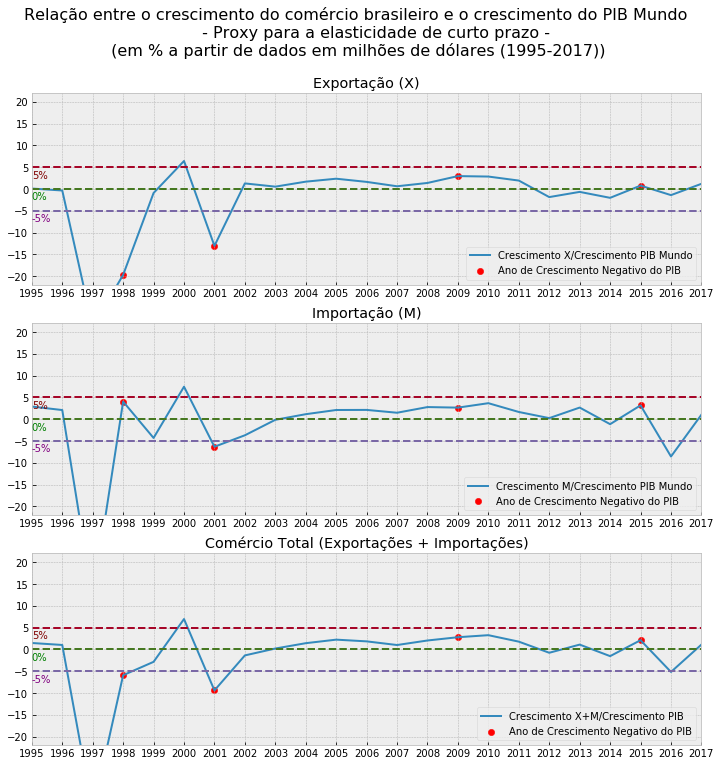

In [20]:
fig, ax = plt.subplots(nrows = 3, figsize = (12,12))
fig.suptitle("Relação entre o crescimento do comércio brasileiro e o crescimento do PIB Mundo\n         - Proxy para a elasticidade de curto prazo - \n (em % a partir de dados em milhões de dólares (1995-2017))", fontsize = 16, color = 'k')
#fig.text(0.47, 0.1,f"*Crescimento do PIB em 2014 (medido em US$ milhões): {df.loc[2014,'crescimento_pib']*100}%", fontsize = 9)

g1 = sns.lineplot(x = df.index.values, y=df['C.Exp/PIBM'], ax = ax[0], label = 'Crescimento X/Crescimento PIB Mundo')
df.loc[df.index.values.tolist(),'cinco'].plot(kind = 'line',ax=ax[0], linestyle = '--',label='_nolegend_')
df.loc[df.index.values.tolist(),'menos_cinco'].plot(kind = 'line',ax=ax[0], linestyle = '--',label='_nolegend_')
df.loc[df.index.values.tolist(),'zero'].plot(kind = 'line',ax=ax[0], linestyle = '--',label='_nolegend_')
aexpm.plot(kind='scatter', x = 'year', y = 'dummyexpm', color='r', ax = ax[0], s = 40,label='Ano de Crescimento Negativo do PIB')
g1.legend(loc='lower right')
g1.set_title("Exportação (X)", color = 'k')
g1.set_xlabel("")
g1.set_ylabel("")
g1.set_xticks(range(1995,2018,1))
g1.set_xlim(1995,2017)
g1.set_ylim(-22,22)
g1.annotate("5%",xy=(1995,2.5), color='#800000')
g1.annotate("0%",xy=(1995,-2.5), color='green')
g1.annotate("-5%",xy=(1995,-7.5), color='purple')
#g1.annotate(f"2014:\n{round(df.loc[2014,'C.Exp/PIB'],2)}", xy = (2013.5,16), backgroundcolor = '#eeeeee', fontsize = 10)


g2 = sns.lineplot(x = df.index.values, y=df['C.Imp/PIBM'], ax = ax[1], label = 'Crescimento M/Crescimento PIB Mundo')
df.loc[df.index.values.tolist(),'cinco'].plot(kind = 'line',ax=ax[1], linestyle = '--',label='_nolegend_')
df.loc[df.index.values.tolist(),'menos_cinco'].plot(kind = 'line',ax=ax[1], linestyle = '--',label='_nolegend_')
df.loc[df.index.values.tolist(),'zero'].plot(kind = 'line',ax=ax[1], linestyle = '--',label='_nolegend_')
aimpm.plot(kind='scatter', x = 'year', y = 'dummyimpm', color='r', ax = ax[1], s = 40,label='Ano de Crescimento Negativo do PIB')
g2.legend(loc='lower right')
g2.set_title("Importação (M)",color = 'k')
g2.set_xlabel("")
g2.set_ylabel("")
g2.set_xticks(range(1995,2018,1))
g2.set_ylim(-22,22)
g2.set_xlim(1995,2017)
g2.annotate("5%",xy=(1995,2.5), color='#800000')
g2.annotate("0%",xy=(1995,-2.5), color='green')
g2.annotate("-5%",xy=(1995,-7.5), color='purple')
#g2.annotate(f"2014:\n{round(df.loc[2014,'C.Imp/PIB'],2)}", xy = (2013.5,16), backgroundcolor = '#eeeeee', fontsize = 10)

g3 = sns.lineplot(x = df.index.values, y=df['C.Tot/PIBM'], ax = ax[2],label='Crescimento X+M/Crescimento PIB')
df.loc[df.index.values.tolist(),'cinco'].plot(kind = 'line',ax=ax[2], linestyle = '--',label='_nolegend_')
df.loc[df.index.values.tolist(),'menos_cinco'].plot(kind = 'line',ax=ax[2], linestyle = '--',label='_nolegend_')
df.loc[df.index.values.tolist(),'zero'].plot(kind = 'line',ax=ax[2], linestyle = '--',label='_nolegend_')
atotm.plot(kind='scatter', x = 'year', y = 'dummytotm', color='r', ax = ax[2], s = 40,label='Ano de Crescimento Negativo do PIB')
g3.legend(loc='lower right')
g3.set_title("Comércio Total (Exportações + Importações)", color = 'k')
g3.set_xlabel("")
g3.set_ylabel("")
g3.set_xticks(range(1995,2018,1))
g3.set_ylim(-22,22)
g3.set_xlim(1995,2017)
g3.annotate("5%",xy=(1995,2.5), color='#800000')
g3.annotate("0%",xy=(1995,-2.5), color='green')
g3.annotate("-5%",xy=(1995,-7.5), color='purple')
#g3.annotate(f"2014:\n{round(df.loc[2014,'C.Tot/PIB'],2)}", xy = (2013.5,16), backgroundcolor = '#eeeeee', fontsize = 10)

#plt.savefig("Elasticidade PIB-Comércio.png", dpi = 300)
plt.show()